##Import Libraries

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

##Import Iris dataset and define the X

In [2]:
#Get the data
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

##Sacale data

In [3]:
X_scaled = StandardScaler().fit_transform(X)

##Create and Fit the PCA Model

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [5]:
X_pca.shape

(150, 2)

##Use the elbow method

In [6]:
inertia_values = []
for i in range(1, 11):  # Check for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

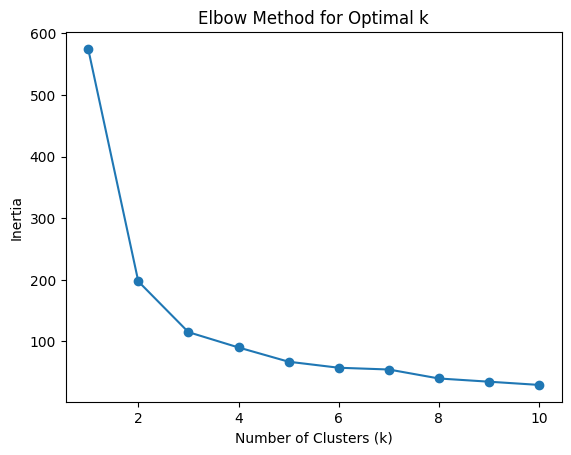

In [7]:
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

##Create and fit a kmeans model

In [8]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

KMeans(n_clusters=3, random_state=42)

In [9]:
cluster_labels = kmeans.labels_

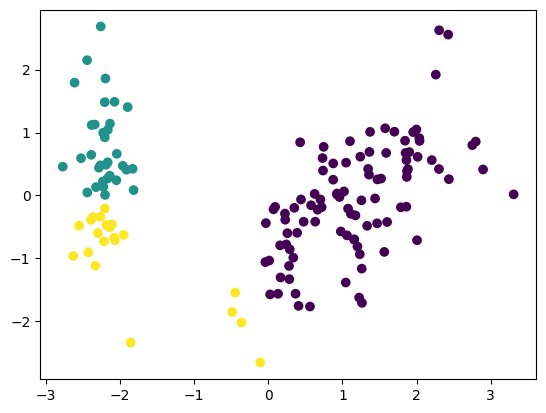

In [10]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels)
plt.show()

##Creating Pairplot with Gemini

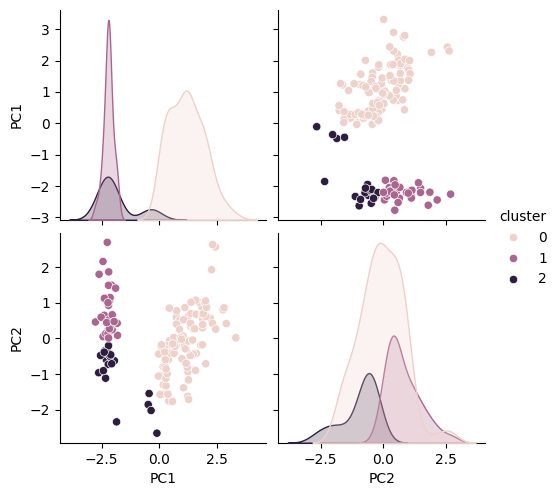

In [11]:
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['cluster'] = cluster_labels
pca_df['species'] = iris.target
sns.pairplot(pca_df, hue='cluster', vars=['PC1', 'PC2'])
plt.show()

In [12]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['cluster'] = kmeans.labels_
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


#Meanshift

In [13]:
from sklearn.cluster import MeanShift

In [14]:
ms = MeanShift()
ms.fit(X_pca)

MeanShift()

In [15]:
ms_labels = ms.labels_

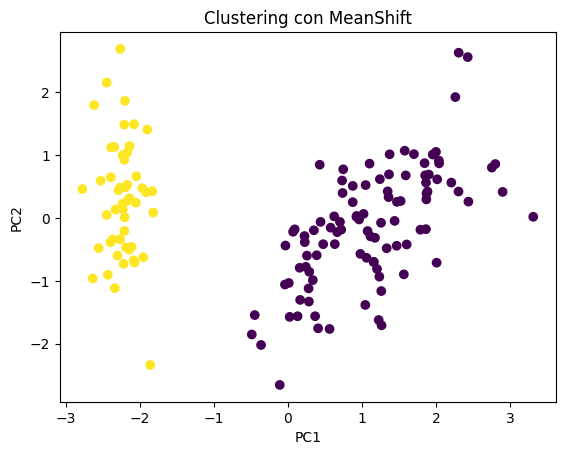

In [18]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=ms_labels)
plt.title('Clustering con MeanShift')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

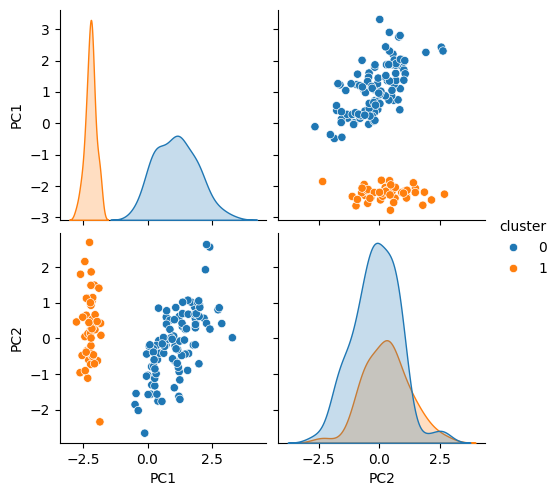

In [43]:
#Graficar usando seaborn
ms_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
ms_df['cluster'] = ms_labels
sns.pairplot(ms_df, hue='cluster', vars=['PC1', 'PC2'])
plt.show()

##Estimar bandwidth y crear un agrupamiento distinto usando Gemini

In [21]:
from sklearn.cluster import estimate_bandwidth
bandwidth = estimate_bandwidth(X_pca, quantile=0.3, n_samples=500, random_state=0)
bandwidth

1.4757505470106822

In [34]:
ms2 = MeanShift(bandwidth=1.3)
ms2.fit(X_pca)

MeanShift(bandwidth=1.3)

In [35]:
ms_labels2 = ms2.labels_

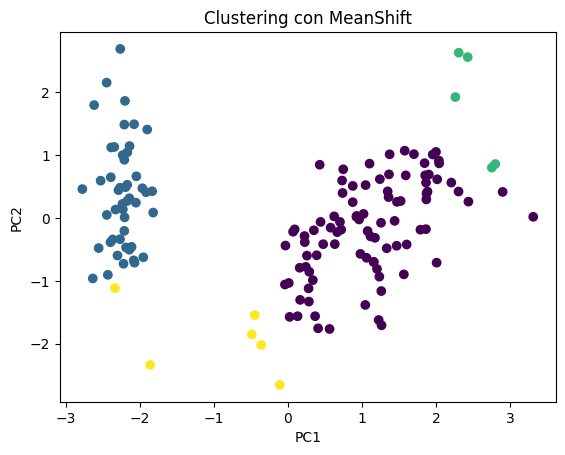

In [36]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=ms_labels2)
plt.title('Clustering con MeanShift')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

#Gaussian Mixture

In [44]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3)
gm.fit(X_pca)

GaussianMixture(n_components=3)

In [39]:
gm_labels = gm.predict(X_pca)

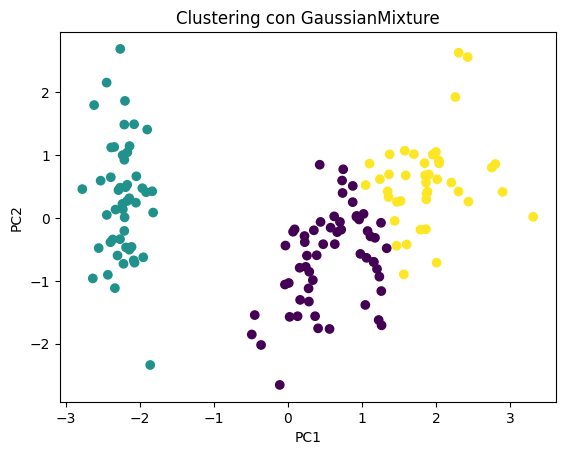

In [41]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gm_labels)
plt.title('Clustering con GaussianMixture')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

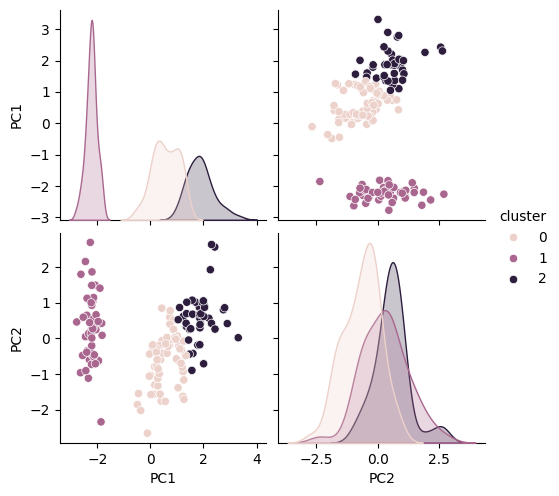

In [42]:
gm_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
gm_df['cluster'] = gm_labels
sns.pairplot(gm_df, hue='cluster', vars=['PC1', 'PC2'])
plt.show()